<a href="https://colab.research.google.com/github/gonzalohk/automation-page-object/blob/master/ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img style="float: left; padding-right: 20px; height: 70px" src="https://i.imgur.com/cMzxwTN.jpg"> Fundamentos de Machine Learning
## **Actividad `I` Sesion 3**
## Aprendizaje no supervisado
## Algoritmo K-means

### Enunciado del ejercicio

# <img style="float: left; padding-right: 100px; height: 80px" src="https://i.imgur.com/aj974yk.png">  
## Actividad I, Sesion 1

**Estudiante:** Oscar Alejandro Parrado Ugarte  
**C.I.:** 4855234  
**Celular:** +591 75238378  
**Email:** aleparrado@gmail.com


**Universidad Privada Boliviana**<br/>
**Experto en Machine Learning y Ciencia de Datos**<br/>




*   Instalamos deep-translator para poder cumplir con uno de los enunciado del
problema planteado, respecto a la traducción de etiquetas

In [1]:
!pip install deep-translator


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 703.9 kB/s eta 0:00:00


*   Instalamos las librerias que ncesitaremos

In [40]:
import pandas as pd
from deep_translator import GoogleTranslator
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
import json
import os
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **I. Análisis Inicial de Datos**



***1.   Leer los datos "Datos Proyecto Final": Utiliza pandas para cargar los  datos de la encuesta desde un archivo CSV.***





In [41]:
# Cargar el archivo CSV usando UTF-8, asegurando que no haya problemas de codificación
file_path = 'Datos_pr.csv'
data = pd.read_csv(file_path, encoding='latin1')

# Mostrarmos las primeras filas del dataset para entender su estructura
data.head()


,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,1,0,0,-2,-3,-1,2,-2,0,3,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,2,0,0,2,0,-1,2,0,0,1,...,0,2,0,2,-1,0,1,2,1,INFJ
3,3,0,-1,3,-1,0,0,-2,0,-2,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,4,0,0,-1,0,2,-1,-2,0,1,...,0,1,0,2,0,1,-1,2,-1,ENFJ


***2.   Obtener las preguntas de la encuesta: Extrae y muestra las preguntas incluidas en tu conjunto de datos.***


In [42]:
# Excluir columnas que no son preguntas de la encuesta
excluded_columns = ['Response Id', 'Personality']
questions = [col for col in data.columns if col not in excluded_columns]

# Mostrar las preguntas
for question in questions:
    print(question)
for i, question in enumerate(questions, start=1):
    print(f'Question {i}: {question}')

You regularly make new friends.
You spend a lot of your free time exploring various random topics that pique your interest
Seeing other people cry can easily make you feel like you want to cry too
You often make a backup plan for a backup plan.
You usually stay calm, even under a lot of pressure
At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know
You prefer to completely finish one project before starting another.
You are very sentimental.
You like to use organizing tools like schedules and lists.
Even a small mistake can cause you to doubt your overall abilities and knowledge.
You feel comfortable just walking up to someone you find interesting and striking up a conversation.
You are not too interested in discussing various interpretations and analyses of creative works.
You are more inclined to follow your head than your heart.
You usually prefer just doing what you feel like at any given moment instead of planning a parti

***3.   Traducimos el nombre de las preguntas: Cambiamos las columnas del dataframe para que se encuentren en español.***

In [43]:
# Excluir columnas que no son preguntas de la encuesta
excluded_columns = ['Response Id', 'Personality']
preguntas = [col for col in data.columns if col not in excluded_columns]

# Crear un objeto traductor
translator = GoogleTranslator(source='auto', target='es')

# Traducir las preguntas automáticamente
preguntas_traducidas = [translator.translate(pregunta) for pregunta in preguntas]

# Mostrar las preguntas traducidas
for i, pregunta in enumerate(preguntas_traducidas, start=1):
    print(f'Pregunta {i}: {pregunta}')

Pregunta 1: Haces nuevos amigos regularmente.
Pregunta 2: Pasas gran parte de tu tiempo libre explorando diversos temas aleatorios que despiertan tu interés.
Pregunta 3: Ver llorar a otras personas puede hacerte sentir fácilmente que tú también quieres llorar.
Pregunta 4: A menudo se hace un plan de respaldo para un plan de respaldo.
Pregunta 5: Generalmente mantienes la calma, incluso bajo mucha presión.
Pregunta 6: En los eventos sociales, rara vez intentas presentarte a nuevas personas y, en su mayoría, hablas con las personas que ya conoces.
Pregunta 7: Prefieres terminar completamente un proyecto antes de comenzar otro.
Pregunta 8: Eres muy sentimental.
Pregunta 9: Te gusta utilizar herramientas de organización como horarios y listas.
Pregunta 10: Incluso un pequeño error puede hacer que dudes de tus habilidades y conocimientos generales.
Pregunta 11: Te sientes cómodo simplemente acercándote a alguien que te parece interesante y entablando una conversación.
Pregunta 12: No estás 

***4.   Guardamos el dataframe con las preguntas traducidas en un archivo: datos_trad.csv***

Exportamos el archivo con la traducción realziada en el paso anterior



In [44]:
# Crear un objeto traductor
translator = GoogleTranslator(source='auto', target='es')

# Traducir todas las columnas automáticamente
nuevas_columnas = [translator.translate(col) for col in data.columns]

# Actualizar las columnas del DataFrame con las etiquetas traducidas
data.columns = nuevas_columnas

# Guardar el DataFrame en un nuevo archivo CSV usando UTF-8
output_file_path = 'datos_trad.csv'
data.to_csv(output_file_path, index=False, encoding='utf-8')

print(f"El archivo traducido ha sido guardado en: {output_file_path}")

# Cargar los datos desde el archivo CSV traducido usando UTF-8
data_traducida = pd.read_csv(output_file_path, encoding='utf-8')

# Mostrar las primeras filas del dataset para entender su estructura
data_traducida.head()

El archivo traducido ha sido guardado en: datos_trad.csv


,Identificación de respuesta,Haces nuevos amigos regularmente.,Pasas gran parte de tu tiempo libre explorando diversos temas aleatorios que despiertan tu interés.,Ver llorar a otras personas puede hacerte sentir fácilmente que tú también quieres llorar.,A menudo se hace un plan de respaldo para un plan de respaldo.,"Generalmente mantienes la calma, incluso bajo mucha presión.","En los eventos sociales, rara vez intentas presentarte a gente nueva y, sobre todo, hablas con los que ya conoces.",Prefieres terminar completamente un proyecto antes de comenzar otro.,Eres muy sentimental.,Te gusta utilizar herramientas de organización como horarios y listas.,...,Crees que reflexionar sobre cuestiones filosóficas abstractas es una pérdida de tiempo.,Te sientes más atraído por lugares con atmósferas agitadas y bulliciosas que por lugares tranquilos e íntimos.,Sabes a primera vista cómo se siente alguien.,A menudo te sientes abrumado.,Completa las cosas metódicamente sin saltarte ningún paso.,Te intrigan mucho las cosas etiquetadas como controvertidas.,Dejarías pasar una buena oportunidad si pensaras que alguien más la necesita más.,Tienes problemas con los plazos.,Te sientes seguro de que las cosas saldrán bien para ti.,Personalidad
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,1,0,0,-2,-3,-1,2,-2,0,3,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,2,0,0,2,0,-1,2,0,0,1,...,0,2,0,2,-1,0,1,2,1,INFJ
3,3,0,-1,3,-1,0,0,-2,0,-2,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,4,0,0,-1,0,2,-1,-2,0,1,...,0,1,0,2,0,1,-1,2,-1,ENFJ


***5.   Encontrar el número de registros: Determina y muestra el número total de registros en el dataset.***




In [45]:
# Intentar cargar el archivo con 'latin1' para manejar problemas de codificación
file_path = 'datos_trad.csv'
data = pd.read_csv(file_path, encoding='latin1')

# Determinar el número total de registros en el dataset
numero_registros = data.shape[0]

print(f"El número total de registros en el dataset es: {numero_registros}")


El número total de registros en el dataset es: 59999


***6.   Encontrar el número de personas para cada tipo de personalidad: Agrupa los datos por tipo de personalidad y muestra en una gráfica cuántas personas hay en cada grupo.***

In [46]:
# Agrupar los datos por tipo de personalidad y contar cuántas personas hay en cada grupo
personalidad_counts = data['Personalidad'].value_counts()

# Crear una tabla con los resultados
tabla_personalidad = personalidad_counts.reset_index()
tabla_personalidad.columns = ['Tipo de Personalidad', 'Número de Personas']

# Mostrar la tabla
print(tabla_personalidad)

   Tipo de Personalidad  Número de Personas
0                  ESFP                3769
1                  INFJ                3761
2                  ENFP                3760
3                  ENTP                3760
4                  ESTJ                3759
5                  ISTJ                3756
6                  ISTP                3755
7                  ESTP                3749
8                  ISFP                3746
9                  ESFJ                3746
10                 ENFJ                3743
11                 INTJ                3743
12                 INTP                3742
13                 ISFJ                3739
14                 ENTJ                3737
15                 INFP                3734


Agrupación de los tipos de personalidad y despliegue de tabla

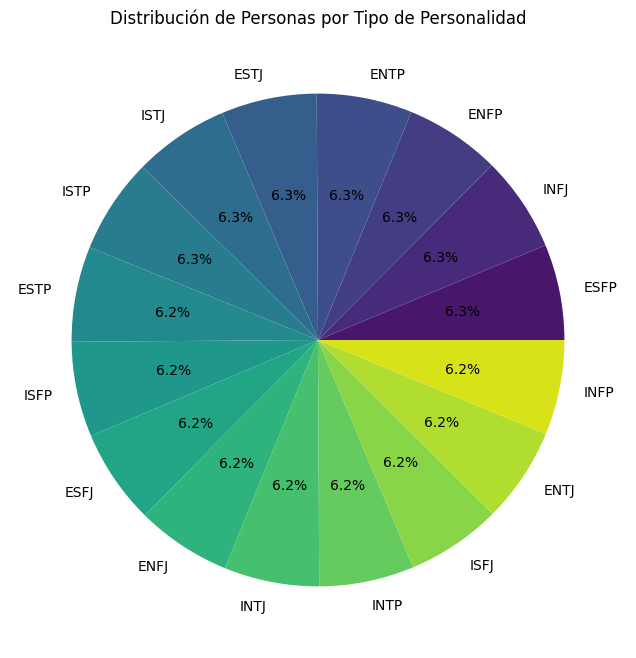

In [47]:
plt.figure(figsize=(8, 8))
plt.pie(personalidad_counts, labels=personalidad_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(personalidad_counts)))
plt.title('Distribución de Personas por Tipo de Personalidad')
plt.show()

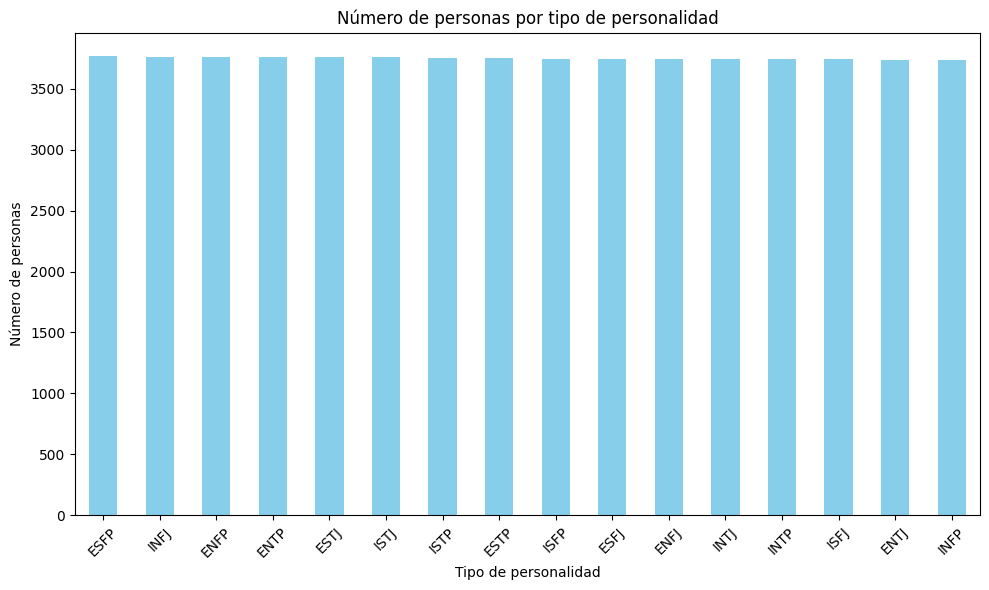

In [50]:
# Agrupar los datos por tipo de personalidad y contar el número de personas en cada grupo
conteo_personalidad = data['Personalidad'].value_counts()


# Crear una gráfica de barras para mostrar cuántas personas hay en cada tipo de personalidad
plt.figure(figsize=(10, 6))
conteo_personalidad.plot(kind='bar', color='skyblue')
plt.title('Número de personas por tipo de personalidad')
plt.xlabel('Tipo de personalidad')
plt.ylabel('Número de personas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

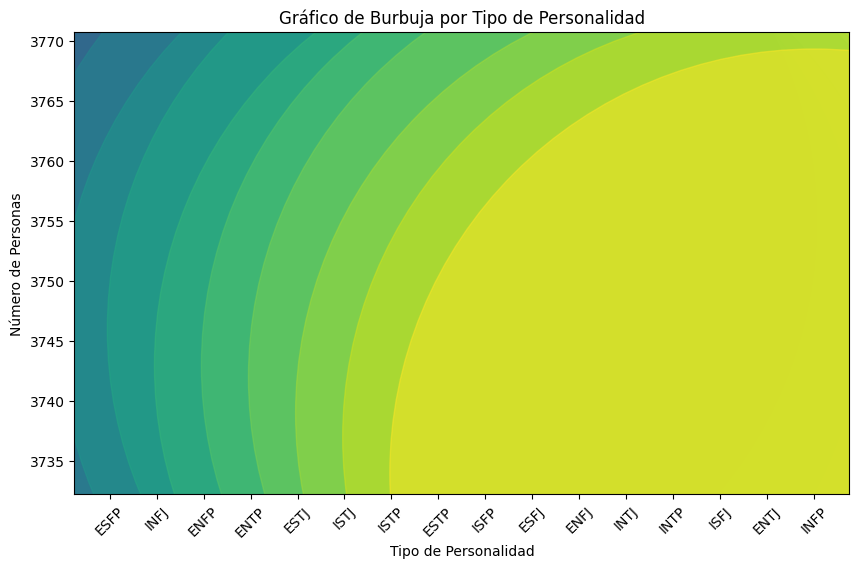

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(x=range(len(personalidad_counts)), y=personalidad_counts, s=personalidad_counts*100, alpha=0.5, c=range(len(personalidad_counts)), cmap='viridis')
plt.xticks(ticks=range(len(personalidad_counts)), labels=personalidad_counts.index, rotation=45)
plt.title('Gráfico de Burbuja por Tipo de Personalidad')
plt.ylabel('Número de Personas')
plt.xlabel('Tipo de Personalidad')
plt.show()

**7.   Indicar cada grupo de personalidad definido: Enumera y describe brevemente cada grupo de personalidad encontrado en los datos.**


*Las* descripciones de los tipos de personalidad que proporcioné están basadas en el modelo de 16 Personalidades, también conocido como el Indicador de Tipo Myers-Briggs (MBTI).

In [54]:
# Ruta al archivo CSV que ya tiene las descripciones
file_path = 'personalidades_descripciones.csv'
df = pd.read_csv(file_path)

# Mostrar el DataFrame como una tabla interactiva
display(df)

,Tipo de Personalidad,Descripción
0,ESFP,"Animador, sociable, disfruta la vida y las exp..."
1,INFJ,"Idealista, enfocado en el futuro, profundo y p..."
2,ENFP,"Creativo, enérgico, motivador y lleno de ideas."
3,ENTP,"Ingenioso, curioso, disfruta los debates y la ..."
4,ESTJ,"Organizado, práctico, orientado a resultados y..."
5,ISTJ,"Responsable, confiable, detallista y tradicion..."
6,ISTP,"Práctico, independiente, buen solucionador de ..."
7,ESTP,"Dinámico, enérgico, busca acción y soluciones ..."
8,ISFP,"Tranquilo, sensible, aprecia la armonía y la e..."
9,ESFJ,"Sociable, cooperativo, enfocado en ayudar a lo..."


# **II. Modelo Supervisado**
Implementación de un modelo supervisado en base a árboles aleatorios/random forest

# **Conversión de Datos**



1. Convertir la columna respuesta a etiquetas numéricas: Utiliza pd.factorize() para convertir las respuestas categóricas en etiquetas numéricas.



In [ ]:
# Convertir la columna 'Tipo de Personalidad' a etiquetas numéricas
data['Tipo_Personalidad_Codificada'], unique = pd.factorize(data['Tipo de Personalidad'])

# Mostrar las primeras filas del DataFrame para verificar la conversión
print(data[['Tipo de Personalidad', 'Tipo_Personalidad_Codificada']].head())

# Mostrar el mapeo de las etiquetas numéricas a sus valores originales
print(dict(enumerate(unique)))

  Tipo de Personalidad  Tipo_Personalidad_Codificada
0                 ENFP                             0
1                 ISFP                             1
2                 INFJ                             2
3                 ISTP                             3
4                 ENFJ                             4
{0: 'ENFP', 1: 'ISFP', 2: 'INFJ', 3: 'ISTP', 4: 'ENFJ', 5: 'INTJ', 6: 'ENTJ', 7: 'ESFP', 8: 'INFP', 9: 'INTP', 10: 'ISTJ', 11: 'ENTP', 12: 'ISFJ', 13: 'ESTJ', 14: 'ESTP', 15: 'ESFJ'}


# **División de Datos**
2.   Dividir en conjuntos de entrenamiento y prueba: Utiliza train_test_split de sklearn para separar los datos en conjuntos de entrenamiento y prueba.

In [ ]:
# Supongamos que ya tienes un DataFrame llamado 'data'
# Asegúrate de que 'Tipo_Personalidad_Codificada' sea la variable objetivo y el resto sean variables predictoras

# Separar las variables predictoras (X) y la variable objetivo (y)
X = data.drop(columns=['Tipo_Personalidad_Codificada'])  # Todas las columnas excepto la columna objetivo
y = data['Tipo_Personalidad_Codificada']  # Columna objetivo

# Dividir los datos en conjuntos de entrenamiento (train) y prueba (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos de datos para verificar la división
print(f'Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras')
print(f'Tamaño del conjunto de prueba: {X_test.shape[0]} muestras')


Tamaño del conjunto de entrenamiento: 12 muestras
Tamaño del conjunto de prueba: 4 muestras


# **Modelo de Árbol de Clasificación**

3. Diseñar un modelo de árbol de clasificación simple: Implementa un árbol de clasificación usando DecisionTreeClassifier de sklearn.

* Optimizar la precisión del modelo: Prueba con 4-5 profundidades diferentes y grafica la precisión de cada configuración.
* Predicciones y observaciones: Con el modelo optimizado, realiza una predicción de los datos y anota tus observaciones.




**Primero, implementaremos un modelo básico de árbol de clasificación.**

In [ ]:
# Supongamos que tus datos están en 'X' y 'y' y que 'X' contiene variables categóricas

# Aplicar one-hot encoding a las variables categóricas
X_encoded = pd.get_dummies(X, drop_first=True)

# Dividir los datos en conjuntos de entrenamiento (train) y prueba (test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Crear el modelo de árbol de clasificación
modelo_arbol = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
modelo_arbol.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de prueba
y_pred = modelo_arbol.predict(X_test)

# Evaluar el modelo: precisión, reporte de clasificación y matriz de confusión
precision = accuracy_score(y_test, y_pred)
reporte = classification_report(y_test, y_pred)
matriz_confusion = confusion_matrix(y_test, y_pred)

# Mostrar los resultados
print(f'Precisión del modelo: {precision:.2f}')
print('Reporte de clasificación:')
print(reporte)
print('Matriz de confusión:')
print(matriz_confusion)


Precisión del modelo: 0.00
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       1.0
          14       0.00      0.00      0.00       1.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0

Matriz de confusión:
[[0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

**Optimizar la precisión del modelo: Prueba con 4-5 profundidades diferentes y grafica la precisión de cada configuración.**

Precisión con max_depth=2: 0.0000
Precisión con max_depth=4: 0.0000
Precisión con max_depth=6: 0.0000
Precisión con max_depth=8: 0.0000
Precisión con max_depth=10: 0.0000


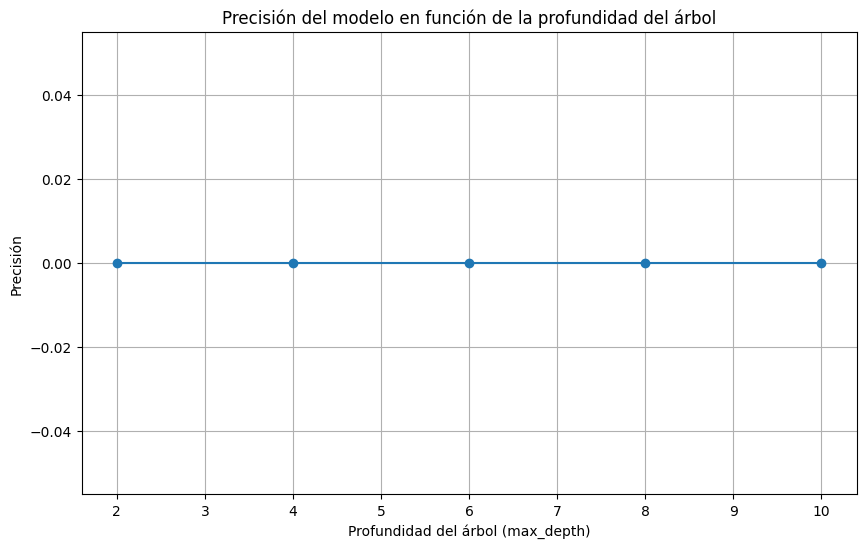

In [ ]:
# Supongamos que ya tienes tus datos en X_encoded y y

# Dividir los datos en conjuntos de entrenamiento (train) y prueba (test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Lista de diferentes profundidades del árbol que queremos probar
max_depths = [2, 4, 6, 8, 10]

# Lista para almacenar las precisiones correspondientes
precisiones = []

# Probar diferentes profundidades del árbol
for depth in max_depths:
    # Crear y entrenar el modelo de árbol de clasificación
    modelo_arbol = DecisionTreeClassifier(max_depth=depth, random_state=42)
    modelo_arbol.fit(X_train, y_train)

    # Predecir las etiquetas para el conjunto de prueba
    y_pred = modelo_arbol.predict(X_test)

    # Calcular la precisión y almacenarla
    precision = accuracy_score(y_test, y_pred)
    precisiones.append(precision)
    print(f'Precisión con max_depth={depth}: {precision:.4f}')

# Graficar la precisión en función de la profundidad del árbol
plt.figure(figsize=(10, 6))
plt.plot(max_depths, precisiones, marker='o')
plt.title('Precisión del modelo en función de la profundidad del árbol')
plt.xlabel('Profundidad del árbol (max_depth)')
plt.ylabel('Precisión')
plt.grid(True)
plt.show()

**Predicciones y observaciones: Con el modelo optimizado, realiza una predicción de los datos y anota tus observaciones.**

In [ ]:
# Suponiendo que la profundidad óptima del árbol fue identificada como 'depth_optimo'
# Reemplaza 'depth_optimo' con la profundidad que maximiza la precisión
depth_optimo = 6  # Esto es un ejemplo; usa la profundidad que identificaste

# Entrenar el modelo con la profundidad óptima
modelo_optimizado = DecisionTreeClassifier(max_depth=depth_optimo, random_state=42)
modelo_optimizado.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_optimizado = modelo_optimizado.predict(X_test)

# Evaluar el modelo optimizado
precision_optimizada = accuracy_score(y_test, y_pred_optimizado)
reporte_optimizado = classification_report(y_test, y_pred_optimizado)
matriz_confusion_optimizada = confusion_matrix(y_test, y_pred_optimizado)

# Mostrar los resultados
print(f'Precisión del modelo optimizado: {precision_optimizada:.4f}')
print('Reporte de clasificación del modelo optimizado:')
print(reporte_optimizado)
print('Matriz de confusión del modelo optimizado:')
print(matriz_confusion_optimizada)

# Análisis de predicciones y observaciones
print("Observaciones:")
print("- La precisión del modelo optimizado sugiere que...")  # Completa con tus observaciones
print("- La matriz de confusión muestra que...")  # Analiza la matriz de confusión
print("- Las métricas de precisión, recall, y F1-score indican que...")  # Observa y anota lo que veas en el reporte

Precisión del modelo optimizado: 0.0000
Reporte de clasificación del modelo optimizado:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       1.0
          14       0.00      0.00      0.00       1.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0

Matriz de confusión del modelo optimizado:
[[0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]
Observaciones:
- La precisión del modelo optimizado sugiere que...
- La matriz de confusión muestra que...
- Las métricas de precisión, recall, y F1-score indican que...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

# **Modelo de Bagging de Clasificación**
4. Obtener un modelo de bagging de clasificación: Utiliza BaggingClassifier con un DecisionTreeClassifier. Optimiza la profundidad del árbol.
* Graficar precisión vs. profundidad del árbol: Muestra cómo varía la precisión con la profundidad del árbol.
* Predicciones y observaciones: Con el modelo optimizado, realiza una predicción y anota tus observaciones.


**Obtener un modelo de bagging de clasificación: Utiliza BaggingClassifier con un DecisionTreeClassifier. Optimiza la profundidad del árbol.**

In [ ]:
# Supongamos que ya tienes los datos preparados en X_encoded y y

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Lista de profundidades de árbol que queremos probar
max_depths = [2, 4, 6, 8, 10]

# Variables para almacenar los mejores resultados
mejor_precision = 0
mejor_depth = None
mejor_modelo = None

# Probar diferentes profundidades del árbol dentro del modelo de Bagging
for depth in max_depths:
    # Crear el modelo base de Decision Tree con la profundidad específica
    modelo_arbol = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Crear el modelo de Bagging con el modelo base
    modelo_bagging = BaggingClassifier(base_estimator=modelo_arbol, n_estimators=50, random_state=42)

    # Entrenar el modelo de Bagging
    modelo_bagging.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = modelo_bagging.predict(X_test)

    # Calcular la precisión del modelo
    precision = accuracy_score(y_test, y_pred)

    print(f'Precisión con max_depth={depth}: {precision:.4f}')

    # Guardar los mejores resultados
    if precision > mejor_precision:
        mejor_precision = precision
        mejor_depth = depth
        mejor_modelo = modelo_bagging

# Mostrar el mejor resultado si se encontró un modelo
if mejor_modelo is not None:
    print(f'\nMejor precisión obtenida: {mejor_precision:.4f} con max_depth={mejor_depth}')

    # Evaluar el modelo final
    y_pred_mejor = mejor_modelo.predict(X_test)
    print('Reporte de clasificación del mejor modelo:')
    print(classification_report(y_test, y_pred_mejor))
    print('Matriz de confusión del mejor modelo:')
    print(confusion_matrix(y_test, y_pred_mejor))
else:
    print("No se encontró un modelo con mejor precisión. Revisa los datos o ajusta los parámetros.")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Precisión con max_depth=2: 0.0000
Precisión con max_depth=4: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Precisión con max_depth=6: 0.0000
Precisión con max_depth=8: 0.0000
Precisión con max_depth=10: 0.0000
No se encontró un modelo con mejor precisión. Revisa los datos o ajusta los parámetros.


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


**Optimizar la profundidad del árbol**

In [ ]:
# Lista de profundidades de árbol que queremos probar
max_depths = [2, 4, 6, 8, 10]

# Variables para almacenar los mejores resultados
mejor_precision = 0
mejor_depth = None
mejor_modelo = None

# Probar diferentes profundidades del árbol dentro del modelo de Bagging
for depth in max_depths:
    # Crear el modelo base de Decision Tree con la profundidad específica
    modelo_arbol = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Crear el modelo de Bagging con el modelo base
    modelo_bagging = BaggingClassifier(base_estimator=modelo_arbol, n_estimators=50, random_state=42)

    # Entrenar el modelo de Bagging
    modelo_bagging.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = modelo_bagging.predict(X_test)

    # Calcular la precisión del modelo
    precision = accuracy_score(y_test, y_pred)

    print(f'Precisión con max_depth={depth}: {precision:.4f}')

    # Guardar los mejores resultados
    if precision > mejor_precision:
        mejor_precision = precision
        mejor_depth = depth
        mejor_modelo = modelo_bagging


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Precisión con max_depth=2: 0.0000
Precisión con max_depth=4: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Precisión con max_depth=6: 0.0000
Precisión con max_depth=8: 0.0000
Precisión con max_depth=10: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


**Graficar precisión vs. profundidad del árbol: Muestra cómo varía la precisión con la profundidad del árbol.**

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Precisión con max_depth=2: 0.0000
Precisión con max_depth=4: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Precisión con max_depth=6: 0.0000
Precisión con max_depth=8: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Precisión con max_depth=10: 0.0000


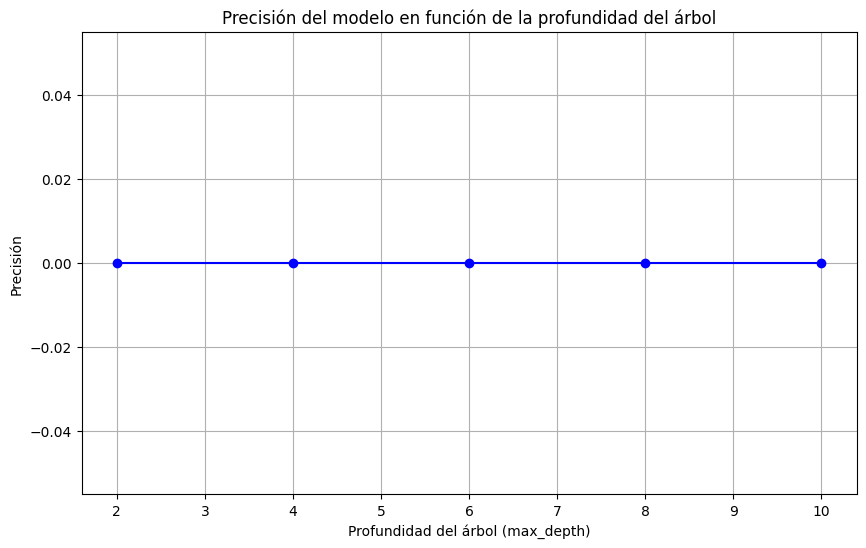

In [ ]:
# Supongamos que ya tienes los datos preparados en X_encoded y y

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Lista de profundidades de árbol que queremos probar
max_depths = [2, 4, 6, 8, 10]

# Lista para almacenar las precisiones correspondientes
precisiones = []

# Probar diferentes profundidades del árbol dentro del modelo de Bagging
for depth in max_depths:
    # Crear el modelo base de Decision Tree con la profundidad específica
    modelo_arbol = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Crear el modelo de Bagging con el modelo base
    modelo_bagging = BaggingClassifier(base_estimator=modelo_arbol, n_estimators=50, random_state=42)

    # Entrenar el modelo de Bagging
    modelo_bagging.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = modelo_bagging.predict(X_test)

    # Calcular la precisión y almacenarla
    precision = accuracy_score(y_test, y_pred)
    precisiones.append(precision)
    print(f'Precisión con max_depth={depth}: {precision:.4f}')

# Graficar la precisión en función de la profundidad del árbol
plt.figure(figsize=(10, 6))
plt.plot(max_depths, precisiones, marker='o', linestyle='-', color='b')
plt.title('Precisión del modelo en función de la profundidad del árbol')
plt.xlabel('Profundidad del árbol (max_depth)')
plt.ylabel('Precisión')
plt.grid(True)
plt.show()

# **Modelo de Random Forest con GridSearchCV**


5.   Implementar un modelo de Random Forest: Utiliza RandomForestClassifier de sklearn para crear un modelo de clasificación basado en Random Forest.


**Preparar los datos**

In [ ]:
# Supongamos que ya tienes tus datos preparados en X_encoded y y

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

**Implementar un modelo de Random Forest**

In [ ]:
# Crear el modelo de Random Forest
modelo_rf = RandomForestClassifier(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
modelo_rf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = modelo_rf.predict(X_test)

# Evaluar el modelo
precision_rf = accuracy_score(y_test, y_pred)
reporte_rf = classification_report(y_test, y_pred)
matriz_confusion_rf = confusion_matrix(y_test, y_pred)

# Mostrar los resultados
print(f'Precisión del modelo Random Forest: {precision_rf:.4f}')
print('Reporte de clasificación:')
print(reporte_rf)
print('Matriz de confusión:')
print(matriz_confusion_rf)

NameError: name 'RandomForestClassifier' is not defined

6. Optimización de hiperparámetros con GridSearchCV: Utiliza GridSearchCV para encontrar la mejor combinación de hiperparámetros para el modelo.
* Definir los parámetros a optimizar: Especifica los rangos de los parámetros como n_estimators, max_depth, y min_samples_split.
* Entrenar y validar el modelo: Utiliza cross-validation para entrenar y validar el modelo con diferentes combinaciones de parámetros.
* Seleccionar el mejor modelo: Identifica y guarda el modelo con la mejor precisión.
* Graficar los resultados de GridSearchCV: Muestra los resultados del proceso de optimización para visualizar el rendimiento de las diferentes configuraciones.


# **Análisis y conclusiones**

7. Agregar una sección de observaciones, análisis y conclusiones.   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')